# Quickstart: Target x Survey, i.e., a DataSet

learn how to merge target inside a survey and simulate a dataset (observed version of target's data)

In [19]:
from skysurvey import survey, target

Following what we learned in Quickstart: target, let's create a SNeIa dataset of 5 000 targets

### Target | data given by nature

In [29]:
%%time
snia = target.SNeIa.from_draw(500)

CPU times: user 14.9 ms, sys: 5.34 ms, total: 20.2 ms
Wall time: 18.7 ms


let's check when "nature started"

In [30]:
starting_date = snia.data["t0"].min()-50 # 50 days before the first target, no need to simulate a survey before that

### Survey | What has been observed when and how. Here ZTF case

In [32]:
%%time
ztf = survey.ZTF.from_random(size=365*2*500, # number of observation  2 years, 500 per day, small for the doc
                     bands=["ztfg","ztfr","ztfi"], # band to observed
                     mjd_range=[starting_date, starting_date+365*4], # timerange of observation
                     skynoise_range=[10,20], # sky noise
                     )

CPU times: user 490 ms, sys: 19 ms, total: 509 ms
Wall time: 508 ms


### Target in Survey | let's check which target belongs to which field.

This is particularly optiomized thanks to a combination of shapely, pandas and geopandas

In [33]:
%%time
fieldid_of_targets = ztf.radec_to_fieldid(*snia.data[["ra","dec"]].values.T)

CPU times: user 109 ms, sys: 5.18 ms, total: 115 ms
Wall time: 114 ms


In [34]:
fieldid_of_targets

index_radec
0            [1253, 258]
1       [239, 1281, 288]
2            [1594, 598]
3            [1522, 528]
4            [757, 1793]
             ...        
495          [1623, 578]
496    [1605, 609, 1654]
497          [383, 1429]
498          [1619, 622]
499     [338, 337, 1329]
Name: fieldid, Length: 499, dtype: object

### DataSet | The object that exploite the target x survey combination.

In [35]:
from skysurvey import DataSet

this not only match then SN with the target but already simulate the obseving point. 

In [36]:
%%time
dset = DataSet.from_targets_and_survey(snia, ztf)

CPU times: user 2.69 s, sys: 207 ms, total: 2.89 s
Wall time: 2.89 s


In [37]:
dset.data

fieldid          time  band       flux    fluxerr    zp zpsys
0   0       1253  58957.338248  ztfr  -7.711901  12.506745  25.0    ab
    1       1253  58984.496693  ztfi  -3.722600  18.747455  25.0    ab
    2       1253  58995.564398  ztfr   3.262966  10.990928  25.0    ab
    3       1253  58996.709686  ztfg -11.147988  18.133933  25.0    ab
    4       1253  59002.826703  ztfg  -8.929913  18.337588  25.0    ab
...          ...           ...   ...        ...        ...   ...   ...
499 201     1329  60391.563472  ztfi  10.060967  15.384363  25.0    ab
    202     1329  60392.315230  ztfg  -5.297772  18.834102  25.0    ab
    203     1329  60392.430690  ztfi   4.125799  19.006958  25.0    ab
    204     1329  60397.077232  ztfi  -0.547374  12.050502  25.0    ab
    205     1329  60409.726350  ztfg -10.762757  15.584560  25.0    ab

[228686 rows x 7 columns]

z         0.164500
x1        0.892000
c         0.115000
t0    59884.041088
x0        0.000096
Name: 90, dtype: float64

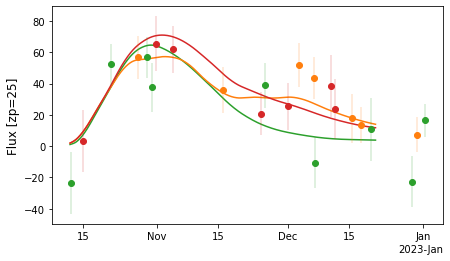

In [39]:
_ = dset.show_target_lightcurve(index=90, phase_window=[-30, 70])
dset.targets.get_template_parameters(index=90)

In [40]:
%%time
dset.get_ndetection(per_band=True)

CPU times: user 48 ms, sys: 13 ms, total: 61 ms
Wall time: 58.7 ms


level_0  band
0        ztfg    2
         ztfi    3
         ztfr    2
1        ztfg    1
         ztfi    3
                ..
498      ztfi    0
         ztfr    0
499      ztfg    0
         ztfi    0
         ztfr    0
Name: detected, Length: 1497, dtype: int64